# **Waze Project - Exploratory Data Analysis**


# **Inspect and analyze data**

#### Overview

**Purpose** 

- This Notebook is to investigate and understand the data provided to gain comprehensive insights into its structure, content, and potential analytical value.

**Objective** 

- To create a Python-based dataframe for thorough data analysis, perform initial data assessment, and communicate findings to team members to inform strategic decision-making.
  
<br/>

*This analysis is organized into three sequential phases:*


**Phase 1: Contextual Understanding** 

- Assess the business context and requirements
- Identify key questions the data needs to answer
- Establish a structured approach for organizing and analyzing the information

**Part 2: Understand the data** 

- Construct a pandas dataframe optimized for analysis
- Generate descriptive statistics and summary metrics
- Document initial observations and potential areas of interest
- Identify data quality issues requiring attention

**Part 3: Variable Analysis** 

- Conduct targeted examination of key variables based on initial findings
- Explore relationships between variables
- Identify patterns, outliers, and potential insights
- Document variable characteristics to guide subsequent analysis


The insights gathered through this exploratory process will serve as the foundation for future statistical modeling, feature engineering, and machine learning development.

<br/>

### **Imports and data loading**

In [5]:
# Import packages for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv('waze_dataset.csv')

### **Summary information**

- Initial Analysis of the Dataframe loaded in.

In [8]:
print('Shape of the DataFrame (Number of Rows, Number of Columns):\n', df.shape)

print('First 10 Rows of the DataFrame for Initial Inspection:\n', df.head(10))

print('Detailed Information About DataFrame Columns and Data Types:\n', df.info())

print('Descriptive Statistics for Numerical Variables (Count, Mean, Std, etc.):\n', df.describe())


Shape of the DataFrame (Number of Rows, Number of Columns):
 (14999, 13)
First 10 Rows of the DataFrame for Initial Inspection:
    ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   
5   5  retained       113     103      279.544437                     2637   
6   6  retained         3       2      236.725314                      360   
7   7  retained        39      35      176.072845                     2999   
8   8  retained        57      46      183.532018                      424   
9   9   churned        84      68      244.802115                     2997   

   total_nav

### **Insights**

- The dataset has 700 missing values in the `label` column.
- The variables `label` and `device` are of type `object`; `total_sessions`, `driven_km_drives`, and `duration_minutes_drives` are of type `float64`; the rest of the variables are of type `int64`.
- There are 14,999 rows and 13 columns - medum-sized Dataset
- DataTypes appear to classified correctly

#### **Investigate Null values in Label column**

Firstly, we can use df.describe() again to compare the summary statistics of the 700 rows that are missing labels with summary statistics of the rows that are not missing any values.

**Question:** 

Is there a discernible difference between the two populations?

**Answer:**
> Comparing summary statistics of the observations with missing retention labels with those that aren't missing any values reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

In [11]:
# NUll DataSet 
null_df = df[df['label'].isnull()]
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [12]:
# Not NUll DataSet 
not_null_df = df[~df['label'].isnull()]
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


### **Null values - device counts**

Waze is either used on Android or iPhone, using the `device` variable, we can explore how many iPhone users had null values and how many Android users had null values?

In [18]:
print('Count of iPhone nulls and Android nulls:\n\n', null_df['device'].value_counts )


print('\n\nCalculate % of iPhone nulls and Android nulls:\n', 100 * null_df['device'].value_counts(normalize=True)  )

print('\n\nCalculate % of iPhone users and Android users in full dataset\n',  100 * df['device'].value_counts(normalize=True))

Count of iPhone nulls and Android nulls:

 <bound method IndexOpsMixin.value_counts of 77        iPhone
80        iPhone
98       Android
111      Android
142       iPhone
          ...   
14941     iPhone
14943     iPhone
14945    Android
14972     iPhone
14993     iPhone
Name: device, Length: 700, dtype: object>


Calculate % of iPhone nulls and Android nulls:
 device
iPhone     63.857143
Android    36.142857
Name: proportion, dtype: float64


Calculate % of iPhone users and Android users in full dataset
 device
iPhone     64.484299
Android    35.515701
Name: proportion, dtype: float64


#### Insights

The results show that there is not a major difference between `null` and `not-null`

### **Null values - Churn vs Retained**


Examine the counts and percentages of users who churned vs. those who were retained. How many of each group are represented in the data?

In [24]:
print('Count of Nulls - Retained and Churned:\n\n',df['label'].value_counts())
print('Count of Dataset - Retained and Churned:\n\n',df['label'].value_counts(normalize=True))

Count of Nulls - Retained and Churned:

 label
retained    11763
churned      2536
Name: count, dtype: int64
Count of Dataset - Retained and Churned:

 label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


This dataset contains 82% retained users and 18% churned users.

Now comparing the medians of each variable for churned and retained users, so that outliers don't unduly affect the portrayal of a typical user. 

In [27]:
# Calculate median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile. 



#### Median kilometers per drive

Calculate the median kilometers per drive in the last month for both retained and churned users.

In [31]:
df['km_per_drive'] = df['driven_km_drives'] / df['drives']

# Group by `label`, calculate the median, and isolate for km per drive
median_km_per_drive = df.groupby('label').median(numeric_only=True)[['km_per_drive']]
median_km_per_drive

,km_per_drive
label,
churned,74.109416
retained,75.014702


The median retained user drove about one more kilometer per drive than the median churned user which doesn't stand out. 

Next, going to calculate how many kilometers per driving day was this?

In [34]:
# Add a column to df called `km_per_driving_day`
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Group by `label`, calculate the median, and isolate for km per driving day
median_km_per_driving_day = df.groupby('label').median(numeric_only=True)[['km_per_driving_day']]
median_km_per_driving_day

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


Now calculating the median number of drives per driving day for each group.

In [37]:
# Add a column to df called `drives_per_driving_day`
df['drives_per_driving_day'] = df['drives'] / df['driving_days']

# Group by `label`, calculate the median, and isolate for drives per driving day
median_drives_per_driving_day = df.groupby('label').median(numeric_only=True)[['drives_per_driving_day']]
median_drives_per_driving_day

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


The median user who churned drove 698 kilometers each day they drove last month, which is ~240% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data drive considerable amounts! 

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

Finally, examining whether there is an imbalance in how many users churned by device type.

In [41]:
# For each label, calculate the number of Android users and iPhone users
df.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

Now, within each group, churned and retained, calculate what percent was Android and what percent was iPhone.

In [44]:
# For each label, calculate the percentage of Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True)*100

label     device 
churned   iPhone     64.865931
          Android    35.134069
retained  iPhone     64.439344
          Android    35.560656
Name: proportion, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

### **Conclusion**

> *The dataset has 700 missing values in the `label` column. There was no obvious pattern to the missing values.*

> The median user who churned drove 698 kilometers each day they drove last month, which is about 240% the per-drive-day distance of retained users. It would be helpful to know how this data was collected and if it represents a non-random sample of users.*

> *Android users comprised approximately 36% of the sample, while iPhone users made up about 64%*

> *Generally, users who churned drove farther and longer in fewer days than retained users. They also used the app about half as many times as retained users over the same period.*

> *The churn rate for both iPhone and Android users was within one percentage point of each other. There is nothing suggestive of churn being correlated with device.*

# **Data Vizualisations**


**Purpose** 

Next we want to vizualise the data so we can understand the data better, spot outliers/ unusual behaviours and the relationships between the data better.

Here is a list of the Vizualisations used:

- Box Plots: Reveal data distribution patterns and identify outliers for continuous metrics like drives and sessions, showing where most user activity concentrates
- Histograms: Essential for understanding variable frequency distributions, highlighting common usage patterns and unusual behaviors
- Scatter Plots: Visualize relationships and correlations between different metrics, revealing potential connections between user behaviors
- Bar Charts: Effectively communicate quantities and levels across categories, making comparisons clear and accessible for stakeholders


In [160]:
# Useful Functions
def build_boxplot(column,**kwargs):
    plt.figure(figsize=(5,1))
    sns.boxplot(x=df[column], **kwargs)
    plt.title(f'{column} box plot')
    plt.show()


def build_histogram(column_str, title=None, median_text=True, **kwargs):
    plt.figure(figsize=(5,3))
    median = round(df[column_str].median(), 1)
    ax = sns.histplot(data=df, x=df[column_str], **kwargs) 

    if median_text==True:
        plt.axvline(median, color='red', linestyle='--') 
        ax.text(0.25, 0.85, f'median={median}', color='red',
                ha='left', va='top', transform=ax.transAxes)
    else:
        pass
    if title:
        plt.title(title)
    else:
        plt.title(f'{column_str} histogram')
    plt.show() 
    
def build_piechart(title, column, **kwargs):
    fig = plt.figure(figsize=(3,3))
    data=df[column].value_counts()
    plt.pie(data,
            labels=[f'{data.index[0]}: {data.values[0]}',
                    f'{data.index[1]}: {data.values[1]}'],
            autopct='%1.1f%%',
            **kwargs
            )
    plt.title(title);

def build_scatter(title, columnx, columny):
    sns.scatterplot(data=df, x=columnx, y=columny)
    plt.title(title)
    plt.plot([0,31], [0,31], color='red', linestyle='--');



#### **`sessions`**

_The number of occurrences of a user opening the app during the month_

The `sessions` variable as highlighted in the Histogram, is a highly right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

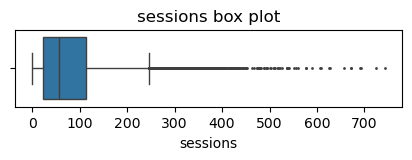

In [163]:
build_boxplot('sessions', fliersize=1) 

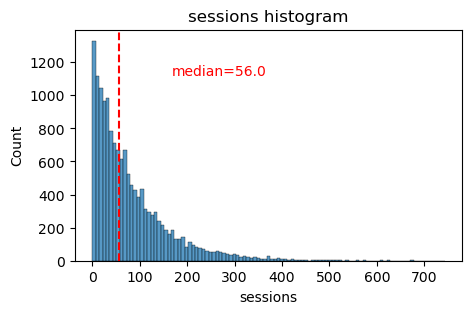

In [165]:
build_histogram('sessions')

#### **`drives`**

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

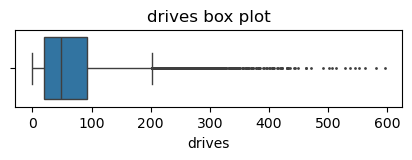

In [168]:
build_boxplot( 'drives', fliersize=1) 

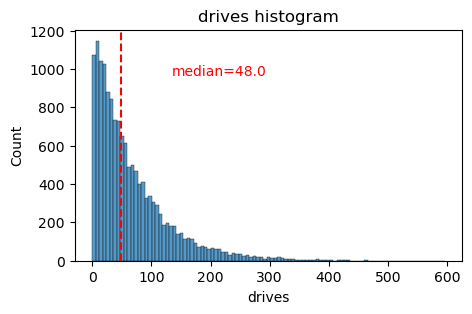

In [170]:
build_histogram('drives')

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems that a large proportion of a user's (estimated) total drives might have taken place in the last month. 

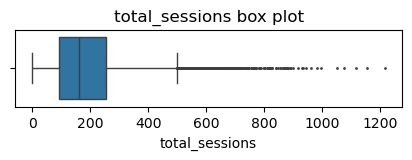

In [173]:
build_boxplot( 'total_sessions', fliersize=1) 

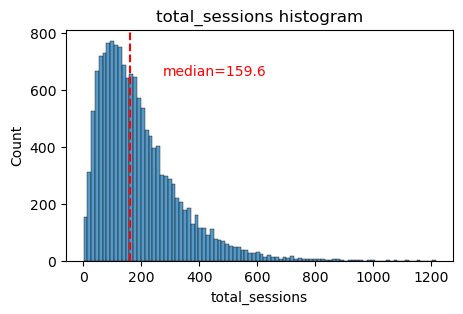

In [174]:
build_histogram('total_sessions')

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

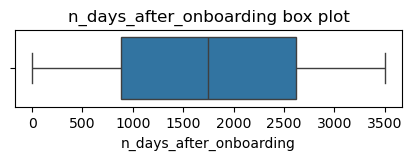

In [178]:
build_boxplot('n_days_after_onboarding', fliersize=1) 

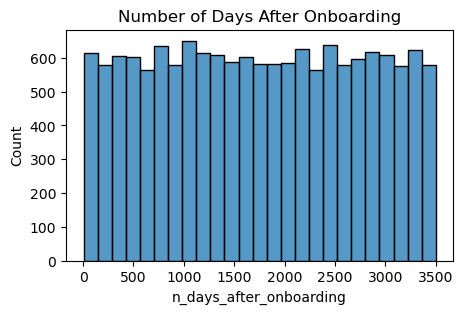

In [179]:
build_histogram('n_days_after_onboarding', title="Number of Days After Onboarding",  median_text=False)

#### **`driven_km_drives`**

_Total kilometers driven during the month_


The number of `drives` driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. 

The users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

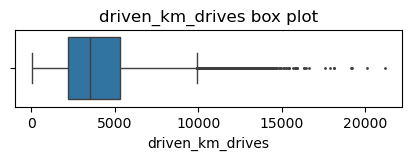

In [183]:
build_boxplot('driven_km_drives', fliersize=1) 

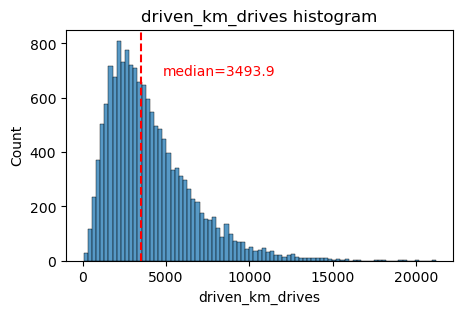

In [185]:
build_histogram('driven_km_drives')

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

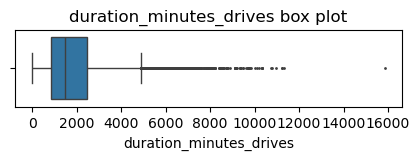

In [188]:
build_boxplot('duration_minutes_drives', fliersize=1) 

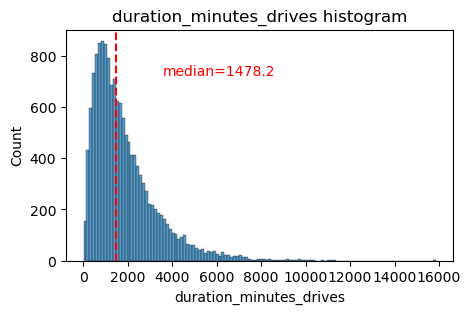

In [190]:
build_histogram('duration_minutes_drives')

#### **`activity_days`**

_Number of days the user opens the app during the month_


Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

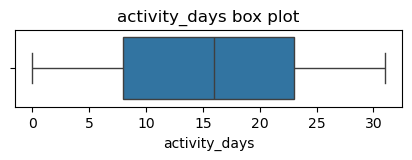

In [94]:
build_boxplot('activity_days', fliersize=1) 

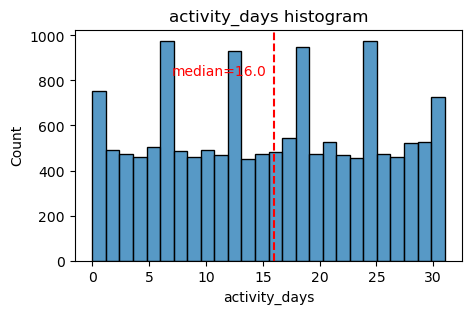

In [96]:
build_histogram('activity_days')

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. 

_To be investigated further_


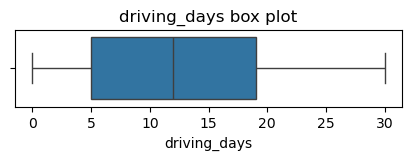

In [99]:
build_boxplot('driving_days', fliersize=1) 

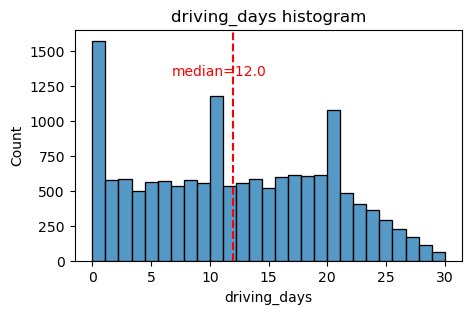

In [101]:
build_histogram('driving_days')

#### **`device`**

_The type of device a user starts a session with_

There are nearly twice as many iPhone users as Android users represented in this data.

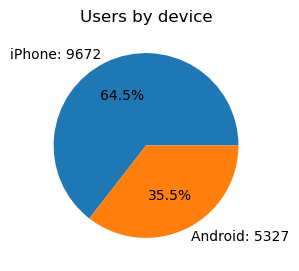

In [104]:
build_piechart('Users by device', 'device')

#### **`label`**

_“retained” vs “churned” for if a user has churned anytime during the course of the month_

Less than 18% of the users churned.

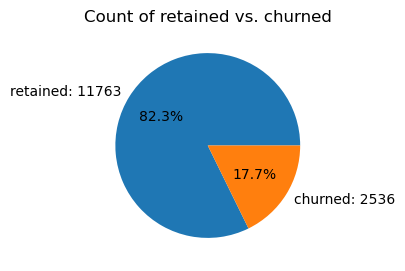

In [107]:
build_piechart('Count of retained vs. churned','label')

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` are closely related, we will see them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

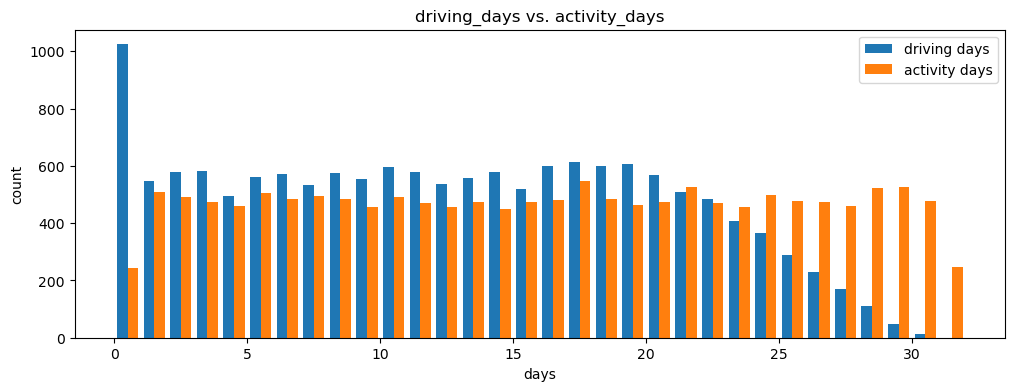

In [110]:
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

The observed pattern may initially appear counterintuitive - we see fewer users with zero app activity days but more users with zero driving days in the month. However, this likely demonstrates that these variables measure different behaviors despite being related. 

Users probably open the app more frequently than they actually use it for driving purposes. This could be explained by users checking estimated travel times, planning routes, adjusting settings, or even opening the app accidentally without driving.

It would be advisable to verify this explanation by contacting the Waze data team for clarification, especially since there seems to be a discrepancy in the maximum number of days recorded between these variables. 

We should specifically confirm the maximum possible values for both `driving_days` and `activity_days` variables to ensure proper data interpretation.

In [113]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


With 15,000 users in the dataset, it's statistically very unlikely that not a single person drove all 31 days of the month. In a dataset of this size, you would typically expect to see the full range of possible values represented.

Creating a scatter plot with `driving_days` and `activity_days` variables on each axis. 

This visualization will reveal:

- The actual range of values present in your data
- Any unusual patterns or gaps that might indicate data collection issues
- The relationship between the two variables
- Potential outliers or clusters that warrant further investigation

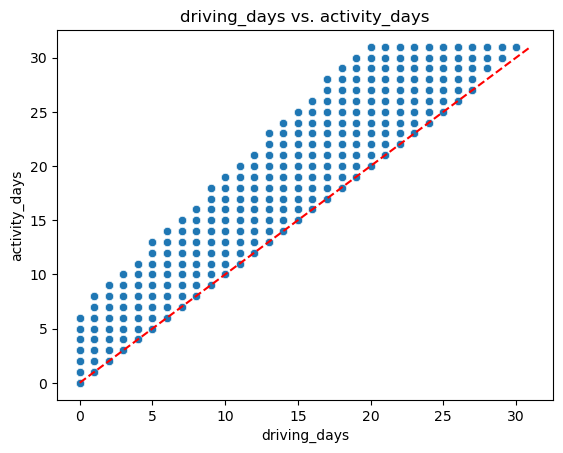

In [116]:
build_scatter('driving_days vs. activity_days', 'driving_days', 'activity_days' )


The data follows an important logical constraint: driving days cannot exceed total activity days.

When someone uses the app while driving, that automatically counts as both a driving day and an activity day. Therefore, every driving day must also be an activity day, making it impossible to have more driving days than activity days.

Our review of the dataset confirms that this logical rule is maintained throughout all records - no users show more driving days than total activity days. This indicates the data is internally consistent on this fundamental relationship, which is a positive sign for overall data quality.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

_`The proportion of churned users to retained users is consistent between device types.`_

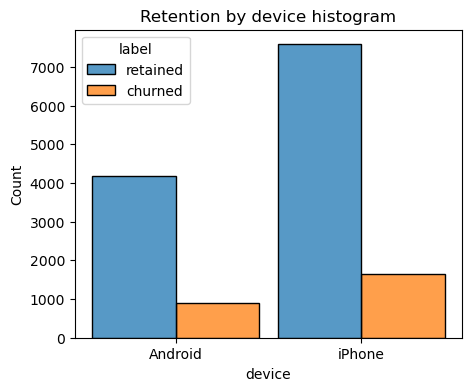

In [120]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

#### **Retention by kilometers driven per driving day**

In the previous Notebook, we discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Examine this further.

1. We will create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [123]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. 

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [126]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### Insights 

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Now we will plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar will be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. 

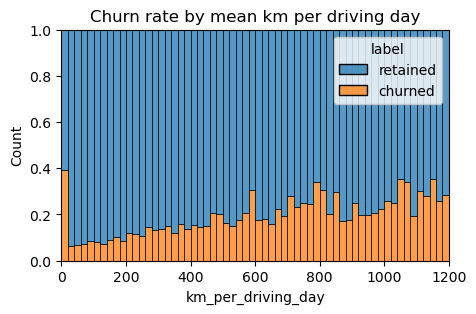

In [193]:
build_histogram('km_per_driving_day', 
                title='Churn rate by mean km per driving day', 
                median_text=False, bins=range(0,1201,20),
                 hue='label', multiple='fill' )

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

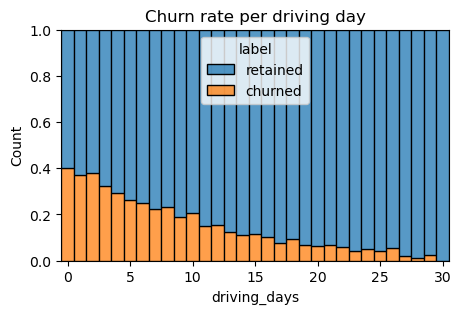

In [197]:
build_histogram('driving_days', 
                title='Churn rate per driving day', 
                median_text=False, bins=range(1,32),
             hue='label', multiple='fill', discrete=True )


The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Creating a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [204]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].median()

0.42309702992763176

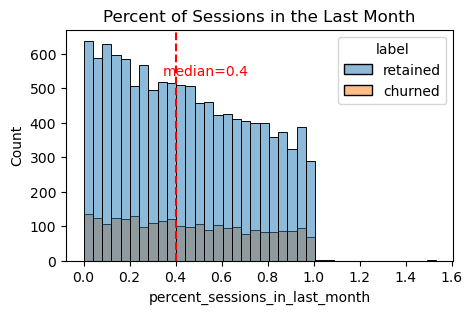

In [208]:
# Distro of values in new column

build_histogram('percent_sessions_in_last_month', 
                title='Percent of Sessions in the Last Month',
                hue=df['label'],
             multiple='layer',
             median_text=True )


In [210]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Now making a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

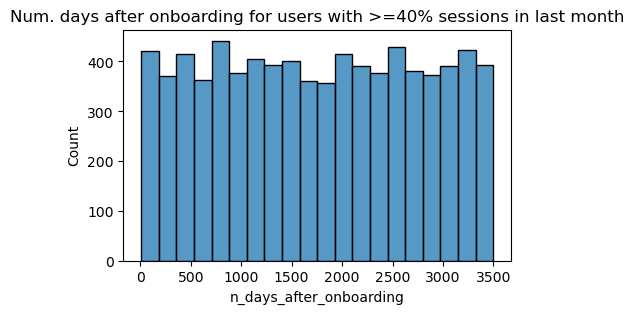

In [214]:
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

It may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

Now we will calculate the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.


In [219]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Apply above function to the following columns:

* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [223]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [225]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,1.499200e+04,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,inf,578.963113,inf,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,NaN,1030.094384,NaN,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775e+00,0.000000,0.000000e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,3.323065e+01,136.238895,1.800000e+00,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,7.488006e+01,272.889272,4.666667e+00,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,1.854667e+02,558.686918,1.216667e+01,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,inf,15420.234110,inf,1.530637


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

It's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

### **Results and evaluation**

I have learned ....

* There is missing data in the user churn label, so we might need  further data processing before further analysis.
* There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
* The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
* On average, retained users have fewer drives than churned users.

My other questions are ....

* How does the missingness in the user churn label arise?
* Who are the users with an extremely large number of drives? Are they ridesharing drivers or commercial drivers?
* Why do retained users have fewer drives than churned users? Is it because churned users have a longer history of using the Waze app?
* What is the user demographic for retained users and churned users?

My client would likely want to know ...

* What are the key variables associated with user churn?
* Can we implement policies to reduce user churn?


In [231]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

In [233]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,8.749890,81.930791,9.363636,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,228.224906,0.086957,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,225.487213,394.602623,1.750000,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,57.645864,132.585488,2.300000,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,88.874416,2014.486765,22.666667,0.343134,0.809524


### **Conclusion**

Now that we've explored and visualized your data, the next step is to share the findings with. 

Here are the key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

> *Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.*

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

> *Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.*

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

> *Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?*

4. What percentage of users churned and what percentage were retained?

> *Less than 18% of users churned, and \~82% were retained.*

5. What factors correlated with user churn? How?

> *Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.*

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?

> *No. Users of all tenures from brand new to \~10 years were relatively evenly represented in the data. This is borne out by the histogram for `n_days_after_onboarding`, which reveals a uniform distribution for this variable.*